In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
data = pd.read_csv('heart.csv')

In [188]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [189]:
data.shape

(1025, 14)

In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [191]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [192]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [193]:
correlation = data.corr()
correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


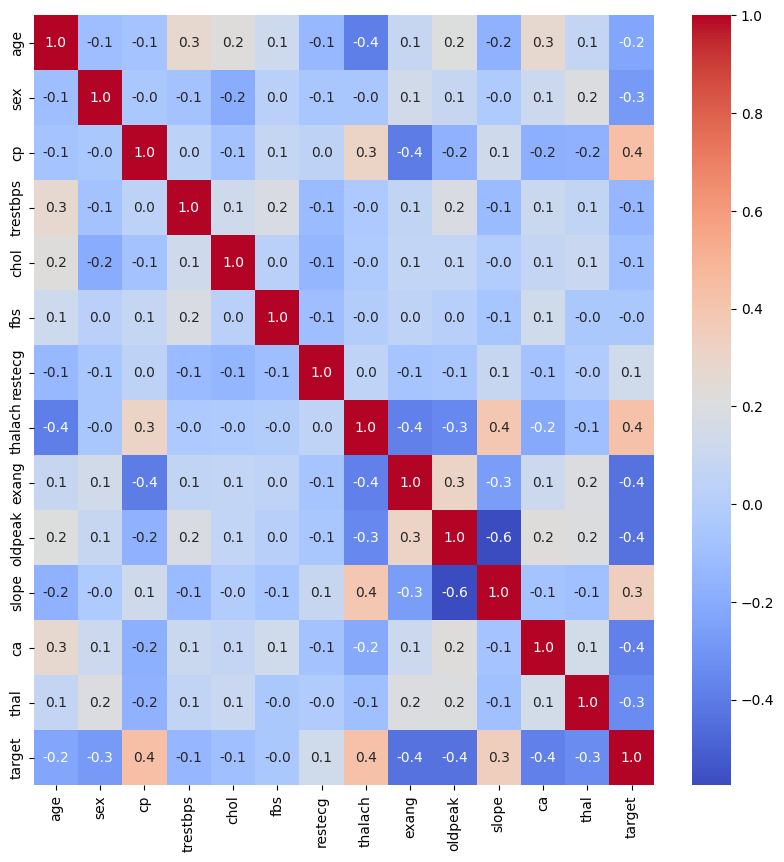

In [194]:
plt.figure(figsize = (10,10))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm', fmt = ".1f");

# Bagging

### Decision Tree

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [196]:
X = data.drop('target', axis = 1)
y = data['target']

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [198]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2


In [199]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [200]:
y_pred_tree = model_tree.predict(X_test)

In [201]:
accuracy_score(y_pred_tree, y_test)

0.9853658536585366

In [202]:
confusion_matrix(y_pred_tree, y_test)

array([[102,   3],
       [  0, 100]])

In [203]:
classification_report(y_pred_tree, y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      0.97      0.99       105\n           1       0.97      1.00      0.99       100\n\n    accuracy                           0.99       205\n   macro avg       0.99      0.99      0.99       205\nweighted avg       0.99      0.99      0.99       205\n'

### Random Forest

In [204]:
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier

In [205]:
bootstrap_sample = resample(data, replace = True, n_samples = len(data), random_state = 42)
oob_sample = data.drop(bootstrap_sample.index)
print("Bootstrap Sample: ", len(bootstrap_sample))
print("Original sample: ", len(data))
print("Unique rows in bootstrap: ", bootstrap_sample.index.nunique())
print("OOB sample: ", len(oob_sample))

Bootstrap Sample:  1025
Original sample:  1025
Unique rows in bootstrap:  652
OOB sample:  373


In [206]:
rf = RandomForestClassifier(
    n_estimators = 100,
    bootstrap = True,
    oob_score = True,
    random_state = 42
)

In [207]:
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [208]:
y_pred_ensemble = rf.predict(X_test)

In [209]:
accuracy_score(y_pred_ensemble, y_test)

0.9853658536585366

In [210]:
confusion_matrix(y_pred_ensemble, y_test)

array([[102,   3],
       [  0, 100]])

In [211]:
classification_report(y_pred_ensemble, y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      0.97      0.99       105\n           1       0.97      1.00      0.99       100\n\n    accuracy                           0.99       205\n   macro avg       0.99      0.99      0.99       205\nweighted avg       0.99      0.99      0.99       205\n'

# Stacking

### KNN

In [212]:
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [213]:
KNC = KNeighborsClassifier()
KNC.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [214]:
y_pred_KNC = KNC.predict(X_test)

In [215]:
accuracy_score(y_pred_KNC, y_test)

0.7317073170731707

In [216]:
confusion_matrix(y_pred_KNC, y_test)

array([[74, 27],
       [28, 76]])

In [217]:
classification_report(y_pred_KNC, y_test)

'              precision    recall  f1-score   support\n\n           0       0.73      0.73      0.73       101\n           1       0.74      0.73      0.73       104\n\n    accuracy                           0.73       205\n   macro avg       0.73      0.73      0.73       205\nweighted avg       0.73      0.73      0.73       205\n'

In [218]:
learners = [
    RandomForestClassifier(n_estimators = 100, random_state = 42),
    KNeighborsClassifier()
]

In [219]:
meta_learner = LogisticRegression()

In [220]:
stacking = StackingClassifier(
    classifiers = learners,
    meta_classifier = meta_learner,
    use_probas = True
)

In [221]:
stacking.fit(X_train, y_train)

,classifiers,"[RandomForestC...ndom_state=42), KNeighborsClassifier()]"
,meta_classifier,LogisticRegression()
,use_probas,True
,drop_proba_col,None
,average_probas,False
,verbose,0
,use_features_in_secondary,False
,store_train_meta_features,False
,use_clones,True
,fit_base_estimators,True
,penalty,'l2'


In [222]:
y_pred_stack = stacking.predict(X_test)

In [223]:
accuracy_score(y_pred_stack, y_test)

0.9853658536585366

In [224]:
confusion_matrix(y_pred_stack, y_test)

array([[102,   3],
       [  0, 100]])

In [225]:
classification_report(y_pred_stack, y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      0.97      0.99       105\n           1       0.97      1.00      0.99       100\n\n    accuracy                           0.99       205\n   macro avg       0.99      0.99      0.99       205\nweighted avg       0.99      0.99      0.99       205\n'

# Boosting

### XGBoost

In [226]:
from xgboost import XGBClassifier

In [227]:
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss'
)

In [228]:
xgb.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [229]:
y_pred_xgb = xgb.predict(X_test)

In [230]:
accuracy_score(y_pred_xgb, y_test)

0.975609756097561

In [231]:
confusion_matrix(y_pred_xgb, y_test)

array([[102,   5],
       [  0,  98]])

In [232]:
classification_report(y_pred_xgb, y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      0.95      0.98       107\n           1       0.95      1.00      0.98        98\n\n    accuracy                           0.98       205\n   macro avg       0.98      0.98      0.98       205\nweighted avg       0.98      0.98      0.98       205\n'

# Deployment

In [233]:
import joblib

In [234]:
joblib.dump(stacking, "models/stack_model.pkl")

['models/stack_model.pkl']